# Import libraries and data set

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creat path
path = r'C:\Users\jeffr\Documents\Instacart Basket Analysis'

In [3]:
# Import "ords_prods_merge3 data set
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge3.pkl'))

In [4]:
ords_prods_merge.shape

(32404859, 30)

In [5]:
# Check data types
ords_prods_merge.dtypes

Unnamed: 0.1                   int64
Unnamed: 0_x                   int64
order_id                       int64
user_id                        int64
eval_set                      object
order_number                   int64
orders_day_of_week             int64
order_time_of_day              int64
days_since_prior_order       float64
product_id                     int64
add_to_cart_order              int64
reordered                      int64
_merge                      category
Unnamed: 0_y                   int64
product_name                  object
aisle_id                       int64
department_id                  int64
prices                       float64
match                       category
price_range_loc               object
prices_range_loc              object
busiest_day                   object
busiest_days                  object
busiest_period_of_day         object
max_order                      int64
loyalty_flag                  object
average_price                float64
s

In [6]:
ords_prods_merge = ords_prods_merge.drop(columns=['_merge'])

In [7]:
ords_prods_merge = ords_prods_merge.drop(columns=['Unnamed: 0.1', 'Unnamed: 0_x'])

In [8]:
ords_prods_merge.dtypes

order_id                       int64
user_id                        int64
eval_set                      object
order_number                   int64
orders_day_of_week             int64
order_time_of_day              int64
days_since_prior_order       float64
product_id                     int64
add_to_cart_order              int64
reordered                      int64
Unnamed: 0_y                   int64
product_name                  object
aisle_id                       int64
department_id                  int64
prices                       float64
match                       category
price_range_loc               object
prices_range_loc              object
busiest_day                   object
busiest_days                  object
busiest_period_of_day         object
max_order                      int64
loyalty_flag                  object
average_price                float64
spending_flag                 object
median_days_since_orders     float64
frequency_flag                object
d

In [6]:
ords_prods_merge = ords_prods_merge.drop(columns=['eval_set', 'Unnamed: 0_y'])

In [7]:
ords_prods_merge.shape

(32404859, 28)

## 2. Bar Charts

<Axes: xlabel='orders_day_of_week'>

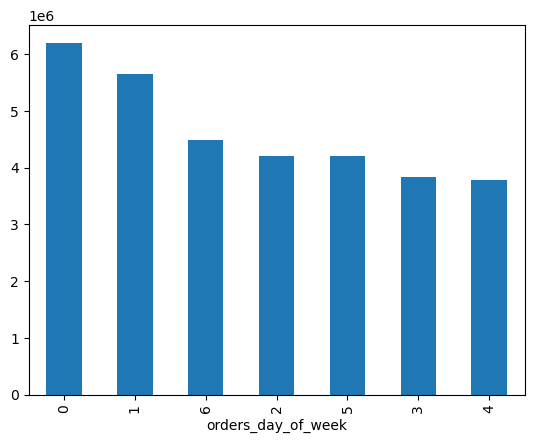

In [13]:
# Creating a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

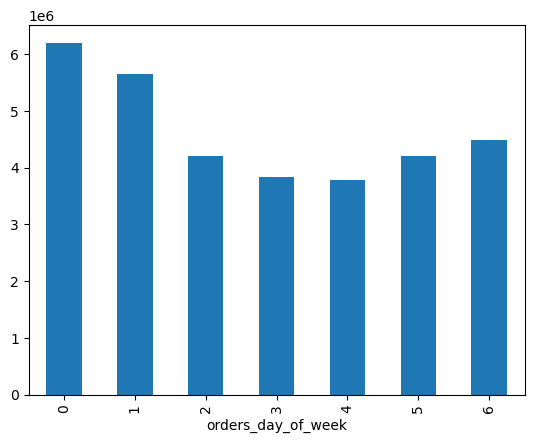

In [14]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

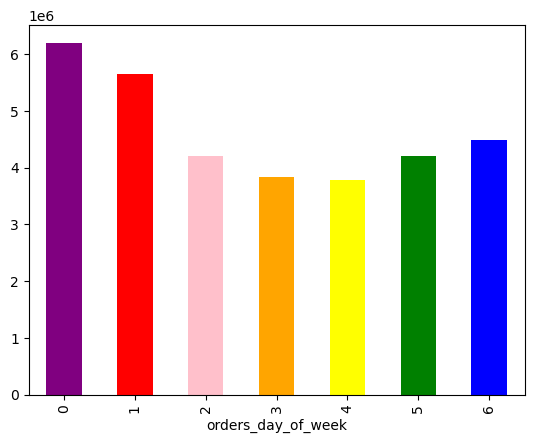

In [16]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

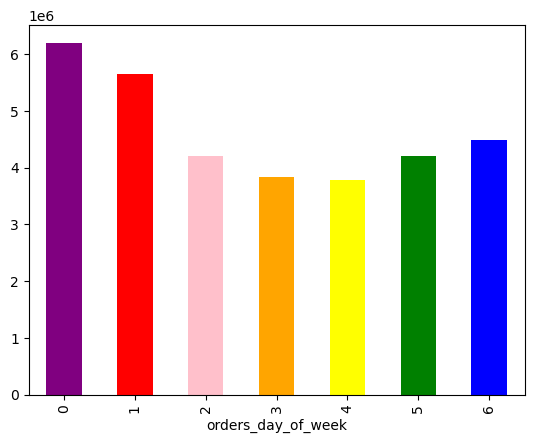

In [17]:
bar.figure

In [18]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow2.png'))

## 3. Histograms

<Axes: ylabel='Frequency'>

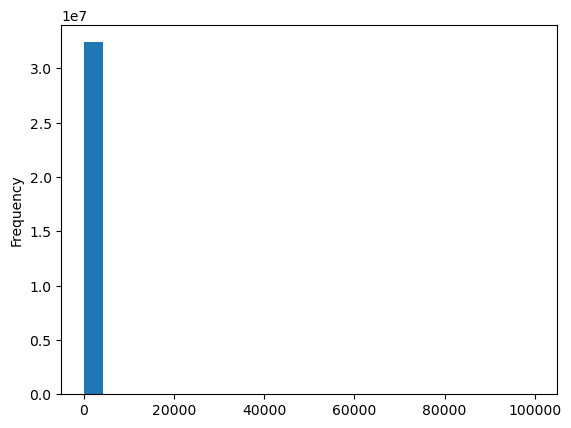

In [19]:
ords_prods_merge['prices'].plot.hist(bins = 24)

In [8]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [9]:
ords_prods_merge['prices'].max()

25.0

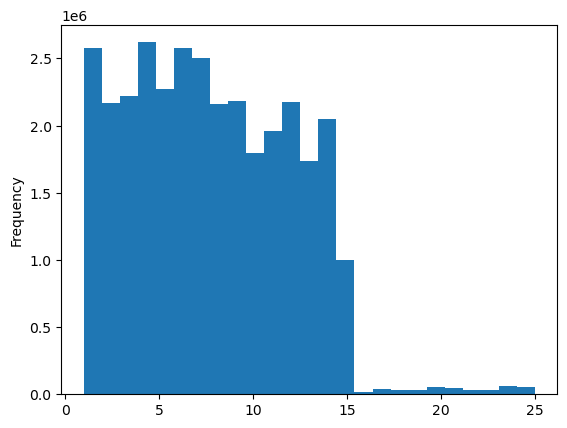

In [22]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

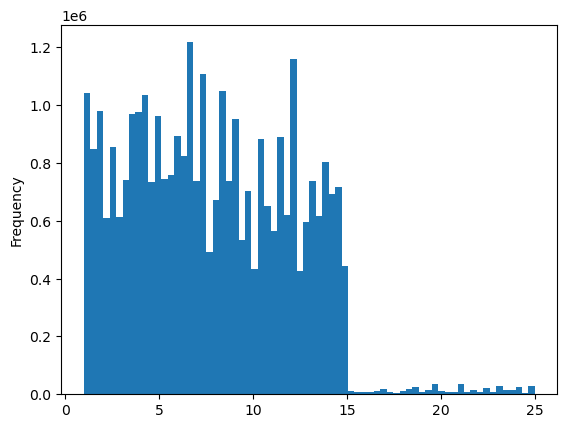

In [10]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [13]:
# Exporting histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices2_.png'))

## 4. Line Charts

In [14]:
np.random.seed(4)

In [15]:
# Create a list holding true/false values to the test np.random.rant() <=0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
# Store 70% of the sample in the dataframe big
big =  ords_prods_merge[dev]

In [18]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [19]:
# test to see if samples add up to total
len(ords_prods_merge)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
df_2 = small[['orders_day_of_week','prices']]

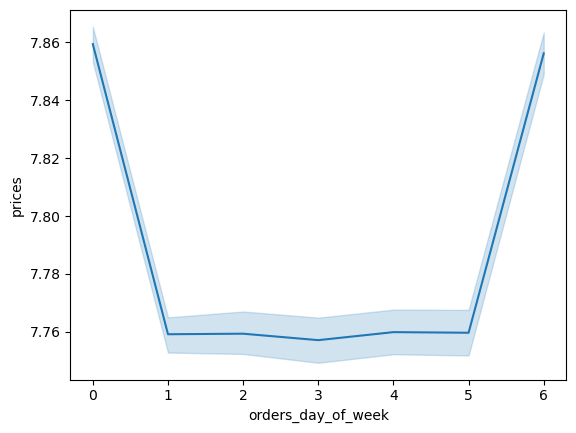

In [22]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [23]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_orders_.png'))

In [24]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge4.pkl'))